In [5]:
cd /content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/

/content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project


In [ ]:
ls

Dataset/      Model_DL_Garbage_Classification.ipynb  val.cache   yolov8n-cls.pt
dataset.yaml  train.cache                            yolo11n.pt


## Persiapan Folder

In [ ]:
import os

base_dir = '/content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/'

# Persiapan folder train, val, test dan kategori mineral
os.makedirs(base_dir + 'train', exist_ok=True)
os.makedirs(base_dir + 'val', exist_ok=True)
os.makedirs(base_dir + 'test', exist_ok=True)

categories = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

for category in categories:
  os.makedirs(base_dir + 'train/' + category, exist_ok=True)
  os.makedirs(base_dir + 'val/' + category, exist_ok=True)
  os.makedirs(base_dir + 'test/' + category, exist_ok=True)

In [ ]:
import shutil
import random

# Definisi fungsi membagi data
def split_data(category, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1):
  category_path = os.path.join(base_dir, 'Dataset', category)
  files = os.listdir(category_path)
  random.shuffle(files)

  # Pembagian data
  train_count = int(len(files) * train_ratio)
  val_count = int(len(files) * val_ratio)

  # Copy file ke folder train, val, test
  for i, file in enumerate(files):
    # memastikan data merupakan file sebelum copy file
    if os.path.isfile(os.path.join(category_path, file)):
      if i < train_count:
        shutil.copy(os.path.join(category_path, file), os.path.join(base_dir, 'train', category, file))
      elif i < train_count + val_count:
        shutil.copy(os.path.join(category_path, file), os.path.join(base_dir, 'val', category, file))
      else:
        shutil.copy(os.path.join(category_path, file), os.path.join(base_dir, 'test', category, file))

# Pembagian data
for category in categories:
  split_data(category)

print('Proses pembagian data selesai.')

Proses pembagian data selesai.


## YOLO Model Training

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.1/949.1 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8n-cls.pt') # load pretrained model
results = model.train(data='/content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/',
                      epochs=12,
                      batch=16,
                      patience=3,
                      device='cuda')

Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/, epochs=12, time=None, patience=3, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

train: Scanning /content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/train... 1766 images, 0 corrupt: 100%|██████████| 1766/1766 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/val... 503 images, 0 corrupt: 100%|██████████| 503/503 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train4
Starting training for 12 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:04<00:00,  3.84it/s]

                   all      0.716      0.988



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  4.60it/s]

                   all      0.801      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  4.53it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  4.32it/s]

                   all      0.871          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:04<00:00,  3.31it/s]

                   all      0.871      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  4.61it/s]

                   all      0.871          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]

                   all      0.901          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:04<00:00,  3.24it/s]

                   all      0.899          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  4.39it/s]

                   all      0.903          1



      Epoch    GPU_mem       loss  Instances       Size


      10/12     0.301G     0.2151          6        224: 100%|██████████| 111/111 [00:22<00:00,  4.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  4.40it/s]

                   all      0.901          1



      Epoch    GPU_mem       loss  Instances       Size


      11/12     0.301G     0.1868          6        224: 100%|██████████| 111/111 [00:24<00:00,  4.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]

                   all      0.911          1



      Epoch    GPU_mem       loss  Instances       Size


      12/12     0.301G     0.1937          6        224: 100%|██████████| 111/111 [00:23<00:00,  4.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]

                   all      0.903          1



12 epochs completed in 0.095 hours.
Optimizer stripped from runs/classify/train4/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train4/weights/best.pt, 3.0MB

Validating runs/classify/train4/weights/best.pt...
Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/train... found 1766 images in 6 classes ✅ 
val: /content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/val... found 503 images in 6 classes ✅ 
test: /content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/test... found 258 images in 6 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:04<00:00,  3.80it/s]


                   all      0.911          1
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train4


## Predict

In [6]:
from ultralytics import YOLO

# use best model from train2
model = YOLO('/content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/runs/classify/train3/weights/best.pt')

In [ ]:
results1 = model.predict('/content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/test/cardboard/cardboard_191.jpg')

print(results1)


image 1/1 /content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/test/cardboard/cardboard_191.jpg: 224x224 cardboard 0.99, paper 0.01, trash 0.00, metal 0.00, glass 0.00, 3.1ms
Speed: 15.6ms preprocess, 3.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
[ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: None
names: {0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}
obb: None
orig_img: array([[[246, 247, 245],
        [246, 247, 245],
        [246, 247, 245],
        ...,
        [231, 234, 232],
        [231, 234, 232],
        [231, 234, 232]],

       [[246, 247, 245],
        [246, 247, 245],
        [246, 247, 245],
        ...,
        [231, 234, 232],
        [231, 234, 232],
        [231, 234, 232]],

       [[246, 247, 245],
        [246, 247, 245],
        [246, 247, 245],
        ...,
        [230, 233, 231],
        [230, 233, 231],
        [230, 233, 231]],

       ...,

     

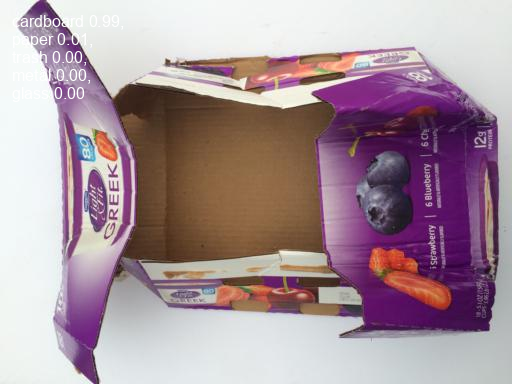

In [ ]:
results1 = results1[0]

results1.show()

## Evaluasi Model

In [7]:
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/runs/classify/train3/weights/best.pt')
metrics = model.val()
print(metrics)

Ultralytics 8.3.90 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/train... found 1766 images in 6 classes ✅ 
val: /content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/val... found 503 images in 6 classes ✅ 
test: /content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/test... found 258 images in 6 classes ✅ 


val: Scanning /content/drive/MyDrive/Geosoftware_DL_YOLO/00. Mini Project/val... 503 images, 0 corrupt: 100%|██████████| 503/503 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:05<00:00,  5.62it/s]


                   all      0.905          1
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val2
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a86af75a150>
curves: []
curves_results: []
fitness: 0.9522862732410431
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9045725464820862, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9522862732410431}
save_dir: PosixPath('runs/classify/val2')
speed: {'preprocess': 0.13375465805230644, 'inference': 0.8004323300193621, 'loss': 0.007707779324663721, 'postprocess': 0.002200964215278775}
task: 'classify'
top1: 0.9045725464820862
top5: 1.0


In [8]:
import pandas as pd

# Ambil Confusion Matrix
conf_matrix = metrics.confusion_matrix.matrix

# Nama kelas mineral
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Buat dataframe agar lebih rapi
df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Print tabel Confusion Matrix
print(df_cm)


           cardboard  glass  metal  paper  plastic  trash
cardboard       77.0    0.0    0.0    0.0      0.0    0.0
glass            0.0   91.0    7.0    0.0      5.0    0.0
metal            1.0    1.0   69.0    1.0      1.0    0.0
paper            2.0    1.0    1.0  112.0      2.0    4.0
plastic          0.0    4.0    3.0    2.0     87.0    4.0
trash            0.0    3.0    2.0    3.0      1.0   19.0


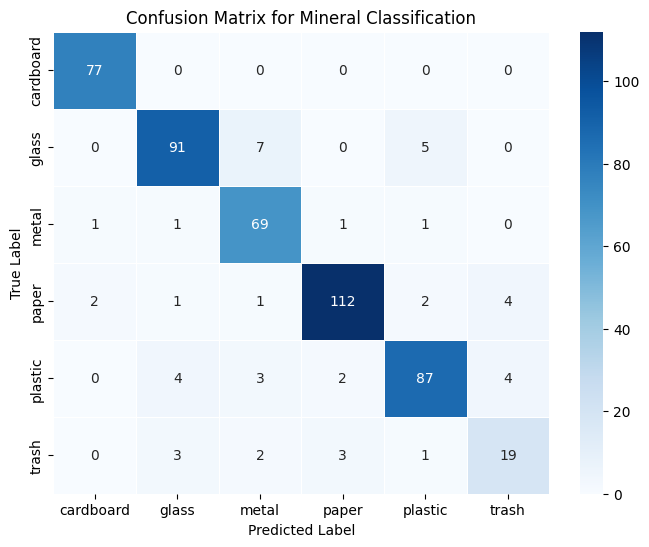

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5)

# Labeling
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Mineral Classification")
plt.show()


In [10]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Ambil confusion matrix dari YOLOv8
conf_matrix = metrics.confusion_matrix.matrix

# Hitung jumlah sampel per kelas (ground truth)
true_labels = np.repeat(np.arange(len(conf_matrix)), conf_matrix.sum(axis=1).astype(int))

# Prediksi model berdasarkan confusion matrix
pred_labels = np.concatenate([np.full(int(n), i) for i, n in enumerate(conf_matrix.sum(axis=0))])

# Hitung Precision, Recall, dan F1-Score per kelas
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average=None)

# Cetak hasil
for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
    print(f"Kelas {i}: Precision={p:.4f}, Recall={r:.4f}, F1-score={f:.4f}")


Kelas 0: Precision=0.9625, Recall=1.0000, F1-score=0.9809
Kelas 1: Precision=1.0000, Recall=0.9709, F1-score=0.9852
Kelas 2: Precision=0.8902, Recall=1.0000, F1-score=0.9419
Kelas 3: Precision=0.9576, Recall=0.9262, F1-score=0.9417
Kelas 4: Precision=0.9896, Recall=0.9500, F1-score=0.9694
Kelas 5: Precision=1.0000, Recall=0.9643, F1-score=0.9818


In [11]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Ambil confusion matrix dari YOLOv8
conf_matrix = metrics.confusion_matrix.matrix

# Hitung jumlah sampel per kelas (ground truth)
true_labels = np.repeat(np.arange(len(conf_matrix)), conf_matrix.sum(axis=1).astype(int))

# Prediksi model berdasarkan confusion matrix
pred_labels = np.concatenate([np.full(int(n), i) for i, n in enumerate(conf_matrix.sum(axis=0))])

# Hitung Precision, Recall, dan F1-Score
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Precision: 0.9660
Recall: 0.9642
F1-score: 0.9644
